# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

In [1]:
# Importamos la definición de los siguientes operadores
import Base: +, -,*, /, ^, sqrt,exp,cos,sin,cosh,sinh,log

Del mismo modo que en el notebook, definimos un número dual:

In [2]:
"""
    Dual

Definición de los números duales. Los campos internos son
    x  :: Float64   # valor de la función
    x′ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x′ :: Float64
end

Dual

In [243]:
"""Para poder extender los operadores, primero debemos definir el dual de un número real"""

Dual(u::Real) = Dual(u, 0.0)


Dual

In [241]:
Dual(v::Real) = Dual(v, 0.0)

Dual

Para el operador  " + " :

In [27]:
+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)
+(a::Real, u::Dual) = Dual( a + u.x, u.x′)
+(u::Dual, a::Real) = Dual( a + u.x, u.x′)

+ (generic function with 183 methods)

In [91]:
Dual(3.2) + Dual(1,2)

Dual(4.2, 2.0)

In [48]:
3.2 + Dual(1,2)

Dual(4.2, 2.0)

In [49]:
Dual(1,2)+3.2

Dual(4.2, 2.0)

Para el operador " - " :

In [118]:
-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)
-(u::Real, v::Dual) = Dual( u - v.x, - v.x′)
-(u::Dual, v::Real) = Dual( u.x - v, u.x′ )

- (generic function with 197 methods)

In [119]:
3.2 - Dual(1,2)

Dual(2.2, -2.0)

In [120]:
Dual(1,2)-3.2

Dual(-2.2, 2.0)

Para el operador " * " :

In [29]:
*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)
*(u::Real, v::Dual) = Dual( u * v.x, u * v.x′ )
*(u::Dual, v::Real) = Dual( u.x * v, u.x′ * v)

* (generic function with 185 methods)

In [259]:
3*Dual(1,2)

Dual(3.0, 6.0)

In [260]:
Dual(1,2)*3

Dual(3.0, 6.0)

Para el operador  " / " :

In [102]:
function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

function /(u::Real, v::Dual)
    y = u / v.x
    Dual( y, (u*v.x′)/(v.x)^2 )
end
function /(u::Dual, v::Real)
    y = u.x / v
    Dual( y, (u.x)/v )
end

/ (generic function with 76 methods)

In [46]:
9.9/Dual(3.3,2)

Dual(3.0000000000000004, 1.8181818181818186)

In [47]:
Dual(3.3,2)/9.9

Dual(0.3333333333333333, 0.16835016835016836)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [10]:
# Esto carga la paquetería Base.Test
using Base.Test

Verifiquemos que la funcionalidad de las definiciones del ejercicio 1 sea la adecuada, para ello construiremos dos tests para cada una.

Para el operador " + " :

Para la primera definición: +(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)

In [19]:
@test Dual(3.2,2) + Dual(1,2) == Dual(4.2,4)

Test Passed

In [20]:
@test Dual(1,2) + Dual(5.5,3.2) == Dual(6.5,5.2)

Test Passed

Para la segunda definición:  +(a::Real, u::Dual) = Dual( a + u.x, u.x′)

In [21]:
@test 3.2 + Dual(1,2) == Dual(4.2,2)

Test Passed

In [22]:
@test 5.3 + Dual(6,2)  == Dual(11.3,2)

Test Passed

Para la tercera definición:  +(u::Dual, a::Real) = Dual( a + u.x, u.x′)

In [24]:
@test Dual(1,2) + 3.2 == Dual(4.2,2)

Test Passed

In [25]:
@test Dual(6,2) + 5.3 == Dual(11.3,2)

Test Passed

Para el operador " - " :

Para la primera definición: -(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)

In [11]:
@test Dual(3,2) - Dual(1,2) == Dual(2,0)

Test Passed

In [20]:
@test Dual(6,2) - 5.3 == Dual(0.7000000000000002,2)

Test Passed

Para la segunda definición:  -(a::Real, u::Dual) = Dual( a - u.x, -u.x′)

In [13]:
@test 3-Dual(5,6) == Dual(-2,-6)

Test Passed

In [24]:
@test 5.5 - Dual(6.1,2.3)  == Dual(-0.5999999999999996,-2.3)

Test Passed

Para la tercera definición:  -(u::Dual, a::Real) = Dual( u.x-a, u.x′)

In [26]:
@test Dual(5,6) - 3 == Dual(2,6)

Test Passed

In [27]:
@test Dual(6,2) - 5.3 == Dual(0.7000000000000002,2)

Test Passed

Para el operador " * " :

Para la primera definición: \*(u::Dual, v::Dual) = Dual( u.x \* v.x, u.x \* v.x′ + u.x′ \* v.x)

In [60]:
@test Dual(3.4,5.2) * Dual(2,4)  == Dual(6.8,24)

Test Passed

In [62]:
@test Dual(4.3,6.2) * Dual(3.2,7) == Dual(13.76,49.94)

Test Passed

Para la segunda definición:  \*(u::Real, v::Dual) = Dual( u \* v.x, u \* v.x′ + u \* v.x)

In [64]:
@test 3.7 * Dual(2,8) == Dual(7.4,37)

Test Passed

In [66]:
@test 5.6 * Dual(8.5,21) == Dual(47.599999999999994,165.2)

Test Passed

Para la tercera definición:    \*(u::Dual, v::Real) = Dual( u.x \* v, u.x \* v + u.x′ \* v)

In [67]:
@test Dual(2,8) * 3.7 == Dual(7.4,37) 

Test Passed

In [68]:
@test Dual(8.5,21) * 5.6 == Dual(47.599999999999994,165.2)

Test Passed

Para el operador " / " :

Para la primera definición: 

    function /(u::Dual, v::Dual)
      y = u.x / v.x
      Dual( y, (u.x′ - y * v.x′)/v.x )
    end


In [17]:
@test Dual(6,3) / Dual(3,5) == Dual(2,-2.3333333333333335)

Test Passed

In [32]:
@test Dual(9.9,2) / Dual(3.3,2) == Dual(3.0000000000000004,-1.2121212121212124)

Test Passed

Para la segunda definición:

    function /(u::Real, v::Dual)
      y = u / v.x
      Dual(y,(u - y * v.x′)/v.x)
    end


In [34]:
@test 6 / Dual(3,5) == Dual(2,-1.3333333333333333)

Test Passed

In [36]:
@test 9.9 / Dual(3.3,2) == Dual(3.0000000000000004, 1.1818181818181817)

Test Passed

Para la tercera definición:

    function /(u::Dual, v::Real)
      y = u.x / v
      Dual( y, (u.x′ - y * v)/v)
    end

In [38]:
@test Dual(3,5) / 6 == Dual(0.5,0.3333333333333333)

Test Passed

In [40]:
@test Dual(3.3,2) / 9.9 == Dual(0.3333333333333333, -0.1313131313131313)

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [183]:
import Base.show

function show(io::IO,u::Dual)
    print(u.x, " + " , u.x′ ,"ϵ")
end


show (generic function with 271 methods)

In [284]:
show(Dual(1,2))

1.0 + 2.0ϵ

## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

Utilizaremos las propiedades de los números duales para obtener la derivada de esta función, aprovechando que cumplen con la regla de la cadena:

In [265]:
g(x)=(3x^2-8x+5)/(7x^3-1)

g (generic function with 1 method)

In [275]:
g(1)

0.0

In [14]:
dual(x0::Real) = Dual(x0, 1)

dual (generic function with 1 method)

In [15]:
x = dual(1)

1.0 + 1.0ϵ

De acuerdo con el notebook, la función dual($x_0$) construye el Dual de la variable $x$ en $x_0$.

In [270]:
g(x)

Dual(0.0, -0.3333333333333333)

Notemos que la primera componente nos muestra el valor que resulta de evaluar g($x$) en $x$=1, mientras que la segunda componente nos muestra el valor de la derivada de g($x$); es decir, g'($x$) evaluada en $x$ = 1. 

La derivada de la función $g(x)$ es: 

$g'(x) = \frac{-21x^4 + 112x^3 - 105x^2 - 6x + 8}{(7x^3-1)^2} $ 

$g'(x)$ evaluada en $x_0=1$ es:


In [74]:
dg(x) = (-21x^4 + 112x^3 - 105x^2 - 6x + 8)/((7x^3-1)^2)

dg (generic function with 1 method)

In [75]:
dg(1)

-0.3333333333333333

In [274]:
abs(g(x).x′ - dg(1))

0.0

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

- Para el primer punto y segundo punto:

Primero, extendamos la función `sqrt` por medio de los `Dual`:

In [56]:
sqrt(u::Dual)=Dual(sqrt(u.x),u.x′/(2sqrt(u.x)))

sqrt (generic function with 11 methods)

In [5]:
dual(x0::Real) = Dual(x0, 1)

dual (generic function with 1 method)

In [58]:
x = dual(100)

100.0 + 1.0ϵ

In [59]:
sqrt(x)

10.0 + 0.05ϵ

Veamos que da justamente el resultado esperado:

In [ ]:
@test 

Para extender la función `exp` por medio de los `Dual` :

In [53]:
exp(u::Dual)=Dual(exp(u.x),u.x′*exp(u.x))

exp (generic function with 11 methods)

In [54]:
x = dual(3)

3.0 + 1.0ϵ

In [55]:
exp(x)

20.085536923187668 + 20.085536923187668ϵ

Veamos que da justamente el resultado esperado:

In [ ]:
@test 

Para extender la función `log` por medio de los `Dual` :

In [3]:
log(u::Dual)=Dual(u.x,u.x′*(1/u.x))

log (generic function with 19 methods)

In [6]:
x = dual(3)

Dual(3.0, 1.0)

In [8]:
log(x)

Dual(3.0, 0.3333333333333333)

Veamos que da el resultado justamente esperado:

In [ ]:
@test

Para extender la función `sin` por medio de los `Dual` :

In [179]:
sin(u::Dual)=Dual(sin(u.x*π/180),u.x′*cos(u.x * π/180))

sin (generic function with 11 methods)

In [289]:
x = dual(90)

90.0 + 1.0ϵ

In [290]:
sin(x)

1.0 + 6.123233995736766e-17ϵ

Veamos que da el resultado justamente esperado:

In [ ]:
@test

Para extender la función `cos` por medio de los `Dual` :

In [33]:
cos(u::Dual)=Dual(cos(u.x),-u.x′*sin(u.x))

cos (generic function with 11 methods)

In [11]:
x = dual(π/2)

Dual(1.5707963267948966, 1.0)

In [12]:
cos(x)

Dual(6.123233995736766e-17, -1.0)

Veamos que da el resultado justamente esperado:

In [ ]:
@test

Para extender la función `sinh`por medio de los `Dual` :

In [16]:
sinh(u::Dual)=Dual(sinh(u.x),u.x′*cosh(u.x))

sinh (generic function with 12 methods)

In [17]:
x = dual(1)

Dual(1.0, 1.0)

In [19]:
sinh(x)

Dual(1.1752011936438014, 1.5430806348152437)

Veamos que da el resultado justamente esperado:

In [ ]:
@test

Para extender la función `cosh`por medio de los `Dual` :

In [20]:
cosh(u::Dual)=Dual(cosh(u.x),u.x′*sinh(u.x))

cosh (generic function with 12 methods)

In [21]:
x = dual(1)

Dual(1.0, 1.0)

In [23]:
cosh(x)

Dual(1.5430806348152437, 1.1752011936438014)

Veamos que da el resultado justamente esperado:

In [ ]:
@test

- Para el tercer punto:

Debemos calcular la derivada de: $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$.

Para ello utilizaremos el método de los números duales, posteriormente compararemos con el resultado analítico para determinar que tan preciso es.

Por medio de de los números duales:

In [180]:
h(x)=sin(x^3 - 2/x^6)

h (generic function with 1 method)

In [181]:
x = dual(2)

Dual(2.0, 1.0)

In [184]:
h(x)

0.1386329728402267 + 11.791281209240948ϵ

La derivada de la función $h$ por este método da:

In [190]:
h(x).x′

11.791281209240948

De manera analítica, la derivada de la función $h$ está dada por:

     
$ h'(x)=cos(x^3 - \frac{2}{x^6})(3x^2 + \frac{12}{x^7})$ evaluada en $x_0=2$ es:

In [233]:
dh(x)=cos((x^3 - 2/(x^6)) *π/180 )*(3x^2 + 12/(x^7))

dh (generic function with 1 method)

In [189]:
dh(2)

11.97697067710301

Comparando el primer valor que corresponde al resultado obtenido por medio de los números duales con el tercer valor, obtenido de manera analítica:

In [224]:
abs(h(x).x′ - dh(2))

0.18568946786206197

Lo que nos indica que no es tan preciso este método.

- Por último, graficaremos la función $h'(x)$ para $x_0 \in [1,5]$.

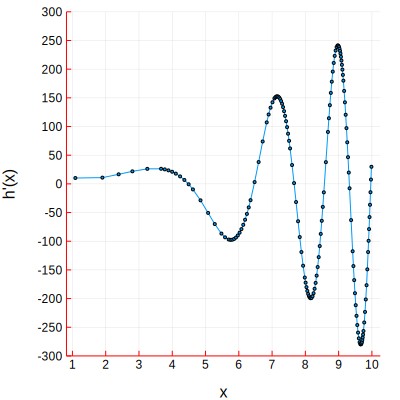

In [288]:
using Plots

plot(dh,1,10,m=2,xaxis=("x",1:10),yaxis=("h'(x)",-300:50:300,(-300,300)),axiscolor=:red,size=(400,400),legend=false)


En el intervalo $x_0 \in [1,5]$ :

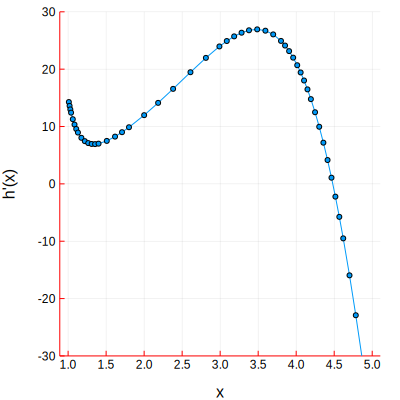

In [285]:
using Plots

plot(dh,1,5,m=3,xaxis=("x",1:0.5:5),yaxis=("h'(x)",(-30,30)),axiscolor=:red,size=(400,400),legend=false)


## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

Para $x_0=2.2$ :

## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba

Para extender la idea de los números Dual y poder calcular derivadas más altas se podría utilizar el método mostrado en los incisos anteriores para obtener la primera derivada junto con un ciclo que permitiera volver a evaluar la primera derivada en el mismo número dual, de este modo obtendríamos la segunda derivada evaluada en ese punto y así sucesivamente hasta la derivada del orden deseado. Ya que el ciclo nos estaría fijando el límite de la cantidad de veces que tendría que repetirse ese procedimiento. 